In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("E:\pyhonfile\IPL_Matches_2008_2022.csv")
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [2]:
df.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [3]:
df.Margin.fillna(value=0,inplace=True)


In [4]:
df['City'].unique().shape

(34,)

In [5]:
df['Venue'].unique().shape
df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [6]:
def change_team_name(x):
    if x=='Deccan Chargers':
        return 'Sunrisers Hyderabad'
    elif x=='Pune Warriors' or x=='Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    elif x=='Delhi Daredevils':
        return 'Delhi Capitals'
    elif x=='Kings XI Punjab':
        return 'Punjab Kings'
    elif x=='Gujarat Titans' or x=='Gujarat Lions':
        return 'Gujarat Titans' 
    else:
        return x
    
df['Team1']=df['Team1'].apply(change_team_name)
df['Team2']=df['Team2'].apply(change_team_name)
df['TossWinner']=df['TossWinner'].apply(change_team_name)
df['WinningTeam']=df['WinningTeam'].apply(change_team_name)

In [7]:
df[df['SuperOver'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,0.0,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,0.0,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,0.0,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Capitals,Rising Pune Supergiants,Feroz Shah Kotla,Delhi Capitals,bat,NaN,NaN,NoResults,0.0,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [8]:
df[df['WinningTeam'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,0.0,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,0.0,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,0.0,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Capitals,Rising Pune Supergiants,Feroz Shah Kotla,Delhi Capitals,bat,NaN,NaN,NoResults,0.0,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [9]:
df.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiants',
       'Kochi Tuskers Kerala'], dtype=object)

In [12]:
df.Team1.replace(('Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiants',
        'Kochi Tuskers Kerala'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.Team2.replace(('Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiants',
        'Kochi Tuskers Kerala'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.TossWinner.replace(('Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiants',
        'Kochi Tuskers Kerala'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.WinningTeam.replace(('Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiants',
        'Kochi Tuskers Kerala'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [13]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,1,6,"Narendra Modi Stadium, Ahmedabad",1,bat,N,6.0,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,2,1,"Narendra Modi Stadium, Ahmedabad",1,field,N,1.0,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,2,7,"Eden Gardens, Kolkata",7,field,N,2.0,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,1,6,"Eden Gardens, Kolkata",6,field,N,6.0,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,3,9,"Wankhede Stadium, Mumbai",3,bat,N,9.0,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [15]:
data=pd.read_csv("E:\pyhonfile\IPL_Ball_by_Ball_2008_2022.csv")
data.head(6)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


C:\Users\Tanay Chillal\AppData\Local\Temp\ipykernel_6880\48114330.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  run_scored=data.groupby('batter').sum()


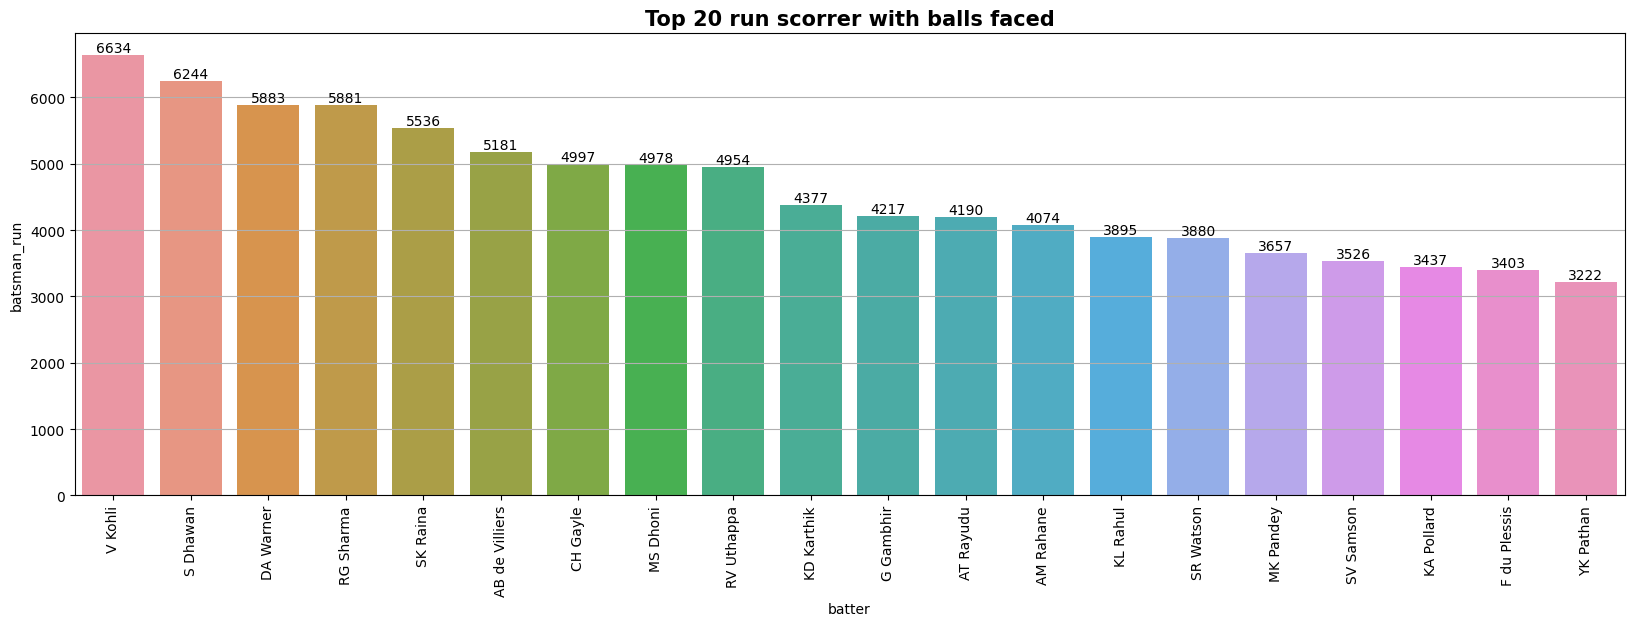

In [16]:
import seaborn as sns

run_scored=data.groupby('batter').sum()
run_scored.reset_index(inplace=True)
fig=plt.figure(figsize=(20,6))
plt.title('Top 20 run scorrer with balls faced',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)

topbatsman=run_scored.sort_values('batsman_run',ascending=False).head(20)
ax=sns.barplot(data=topbatsman,x='batter',y='batsman_run')

for i in ax.containers:
    ax.bar_label(i,)

In [17]:
run_scored

,batter,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
0,A Ashish Reddy,137869458,277,3116,720,280,8,288,0,15
1,A Badoni,181265733,189,1922,505,161,12,173,0,9
2,A Chandila,4136511,7,125,23,4,0,4,0,1
3,A Chopra,26324575,78,392,273,53,5,58,0,5
4,A Choudhary,21652432,28,351,71,25,0,25,0,2
...,...,...,...,...,...,...,...,...,...,...
600,Yash Dayal,1304081,1,19,6,0,0,0,0,1
601,Yashpal Singh,26278255,113,511,250,47,2,49,0,4
602,Younis Khan,2352133,14,14,25,3,0,3,0,1
603,Yuvraj Singh,1479111979,3287,25077,8162,2754,130,2884,0,109


C:\Users\Tanay Chillal\AppData\Local\Temp\ipykernel_6880\2643494483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets_taken=data[(data['kind']!='run out')&(data['kind']!='retired hurt')&(data['kind']!='obstructing the field')].groupby('bowler').sum()


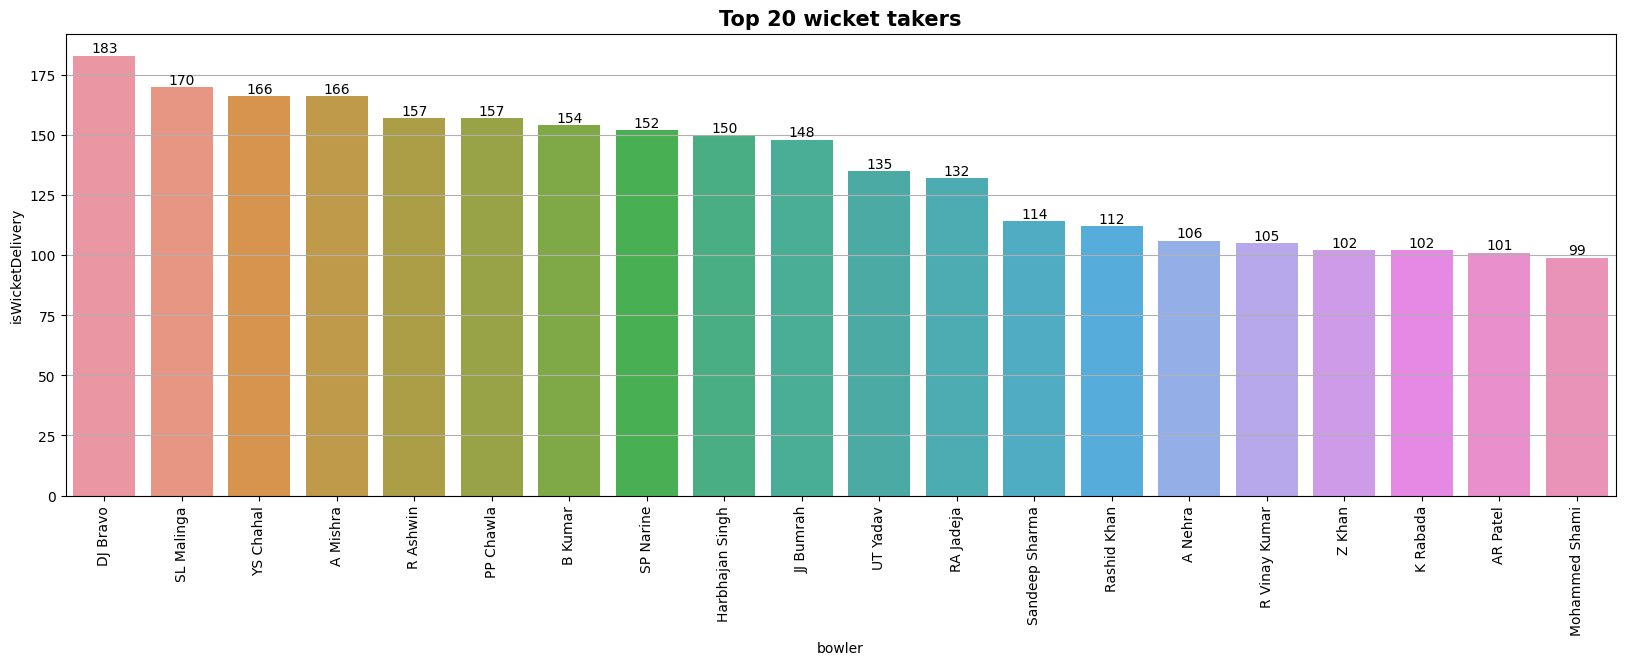

In [18]:
wickets_taken=data[(data['kind']!='run out')&(data['kind']!='retired hurt')&(data['kind']!='obstructing the field')].groupby('bowler').sum()
wickets_taken.reset_index(inplace=True)
plt.figure(figsize=(20,6))
plt.title('Top 20 wicket takers',size=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.grid(visible=True)

topwickets=wickets_taken.sort_values('isWicketDelivery',ascending=False).head(20)
ax=sns.barplot(data=topwickets,x='bowler',y='isWicketDelivery')
for i in ax.containers:
    ax.bar_label(i,)

In [19]:
topwickets

,bowler,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
109,DJ Bravo,2734077390,4844,41842,12030,4169,257,4426,1,183
393,SL Malinga,2010509143,4494,29589,10829,3187,290,3477,0,170
468,YS Chahal,3189009699,4590,28972,10556,3524,175,3699,0,166
7,A Mishra,2454638067,5101,34445,11827,3895,125,4020,1,166
317,R Ashwin,3530204343,6300,35179,14461,4380,209,4589,0,157
310,PP Chawla,2379902006,4749,33214,11650,4231,134,4365,0,157
63,B Kumar,3252481791,4992,27744,12212,3816,246,4062,1,154
401,SP Narine,3410107902,4912,36553,12399,3747,152,3899,0,152
149,Harbhajan Singh,2554676135,5246,29463,12478,3925,173,4098,0,150
177,JJ Bumrah,3152455690,4312,30629,10269,3294,201,3495,0,148


In [20]:
topbatsman

,batter,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
569,V Kohli,4557729029,7692,42599,18441,6634,242,6876,2,193
462,S Dhawan,4624377952,7287,31374,17981,6244,317,6561,1,179
130,DA Warner,3950963740,6376,27099,15161,5883,308,6191,0,143
430,RG Sharma,3768938581,6697,40783,16371,5881,202,6083,1,203
493,SK Raina,3095619985,5935,36252,15209,5536,244,5780,0,168
27,AB de Villiers,2921390058,4989,36682,12684,5181,173,5354,0,125
108,CH Gayle,2811701391,5097,21811,12774,4997,339,5336,1,128
339,MS Dhoni,3052807492,5425,52346,14056,4978,243,5221,0,142
452,RV Uthappa,3105050932,6106,27483,13920,4954,292,5246,0,184
256,KD Karthik,2794829612,4885,37942,12283,4377,195,4572,0,168


In [21]:
x=topbatsman['batter']
y=topwickets['bowler']


In [27]:
z=pd.concat([x,y] ,axis=0)
z=z.tolist()
z

['V Kohli',
 'S Dhawan',
 'DA Warner',
 'RG Sharma',
 'SK Raina',
 'AB de Villiers',
 'CH Gayle',
 'MS Dhoni',
 'RV Uthappa',
 'KD Karthik',
 'G Gambhir',
 'AT Rayudu',
 'AM Rahane',
 'KL Rahul',
 'SR Watson',
 'MK Pandey',
 'SV Samson',
 'KA Pollard',
 'F du Plessis',
 'YK Pathan',
 'DJ Bravo',
 'SL Malinga',
 'YS Chahal',
 'A Mishra',
 'R Ashwin',
 'PP Chawla',
 'B Kumar',
 'SP Narine',
 'Harbhajan Singh',
 'JJ Bumrah',
 'UT Yadav',
 'RA Jadeja',
 'Sandeep Sharma',
 'Rashid Khan',
 'A Nehra',
 'R Vinay Kumar',
 'Z Khan',
 'K Rabada',
 'AR Patel',
 'Mohammed Shami']

In [62]:
bestteam1=[]
count=0
for i in range(950):
    s=df.iloc[i][16]
    s=s[1:len(s)-1]
    list=s.split(",")
    for j in list:
        for k in z:
            if(eval(j)==(k)):
                count+=1;
    bestteam1.append(count)
    count=0

In [61]:
bestteam1[:10]

[3, 3, 3, 3, 1, 2, 2, 2, 1, 1]

In [60]:
bestteam2=[]
for i in range(950):
    s=df.iloc[i][17]
    s=s[1:len(s)-1]
    list=s.split(",")
    for j in list:
        for k in z:
            if(eval(j)==(k)):
                count+=1;
    bestteam2.append(count)
    count=0

In [59]:
bestteam2[:10]

[2, 3, 1, 2, 2, 2, 3, 3, 2, 2]

In [33]:
dp=df
dp['TopinTeam1']=bestteam1
dp['TopinTeam2']=bestteam2
dp.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin               0
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
TopinTeam1           0
TopinTeam2           0
dtype: int64

In [34]:
dp=dp.drop(['ID','City','Date','Season','MatchNumber','TossDecision','method','Player_of_Match','Umpire1','Umpire2'] ,axis='columns')

In [36]:
dp.dropna(inplace=True)

In [37]:
dp.WinningTeam.astype(int)

0      6
1      1
2      2
3      6
4      9
      ..
945    8
946    2
947    4
948    5
949    8
Name: WinningTeam, Length: 946, dtype: int32

In [38]:
dp.SuperOver.replace(('N','Y'),(0,1) , inplace=True)

In [39]:
dp.SuperOver.unique()

array([0, 1], dtype=int64)

In [40]:
dp.head()

,Team1,Team2,Venue,TossWinner,SuperOver,WinningTeam,WonBy,Margin,Team1Players,Team2Players,TopinTeam1,TopinTeam2
0,1,6,"Narendra Modi Stadium, Ahmedabad",1,0,6.0,Wickets,7.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",3,2
1,2,1,"Narendra Modi Stadium, Ahmedabad",1,0,1.0,Wickets,7.0,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",3,3
2,2,7,"Eden Gardens, Kolkata",7,0,2.0,Runs,14.0,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",3,1
3,1,6,"Eden Gardens, Kolkata",6,0,6.0,Wickets,7.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",3,2
4,3,9,"Wankhede Stadium, Mumbai",3,0,9.0,Wickets,5.0,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",1,2


In [41]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
dp['Venue']=label.fit_transform(dp.Venue)

In [42]:
dp=dp.drop(['WonBy'],axis='columns')

In [43]:
dp.head()

,Team1,Team2,Venue,TossWinner,SuperOver,WinningTeam,Margin,Team1Players,Team2Players,TopinTeam1,TopinTeam2
0,1,6,26,1,0,6.0,7.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",3,2
1,2,1,26,1,0,1.0,7.0,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",3,3
2,2,7,12,7,0,2.0,14.0,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",3,1
3,1,6,12,6,0,6.0,7.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",3,2
4,3,9,47,3,0,9.0,5.0,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",1,2


In [44]:
x=dp[['Team1','Team2','TopinTeam1','TopinTeam2','Margin','Venue','SuperOver','TossWinner']]
y=dp[['WinningTeam']]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2 , random_state=0)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train,y_train)


C:\Users\Tanay Chillal\AppData\Local\Temp\ipykernel_6880\1627132473.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand.fit(x_train,y_train)


RandomForestClassifier()

In [53]:
from sklearn import metrics
rpred=rand.predict(x_test)
print(metrics.accuracy_score(y_test,rpred))

0.5894736842105263


In [54]:
rpred

array([ 4.,  1.,  9., 10.,  8.,  3.,  1.,  1.,  9.,  2.,  3.,  2.,  5.,
        5.,  5.,  3., 10.,  4.,  2.,  5.,  3.,  8.,  9.,  3.,  5.,  5.,
        4., 11.,  9.,  8., 10.,  3.,  1.,  2.,  3.,  2.,  9., 11.,  2.,
        5.,  5.,  1.,  5.,  5.,  3.,  1.,  1.,  9.,  3.,  1.,  9.,  2.,
       10.,  2.,  4.,  5., 10.,  2., 10.,  1., 10.,  3.,  4.,  1.,  9.,
       10.,  4.,  9.,  8.,  3.,  2., 10.,  8.,  8.,  8.,  3., 11.,  2.,
        2., 10.,  8.,  2.,  8.,  5.,  1., 10.,  4.,  9.,  9., 10.,  4.,
        9.,  3.,  3.,  5., 10.,  3.,  8.,  6.,  5., 10.,  5.,  5., 10.,
        2.,  8., 10.,  3.,  5.,  6.,  3.,  1.,  2.,  9.,  1.,  5.,  8.,
        1.,  2.,  1., 10.,  8., 10.,  2.,  4.,  3.,  2.,  8.,  2.,  9.,
        4.,  5.,  9.,  4., 11.,  1.,  2.,  9.,  5., 10.,  2.,  8.,  1.,
        4.,  5.,  4., 10.,  8.,  9.,  5.,  9.,  3.,  5.,  1., 11.,  3.,
        5.,  2., 10.,  3.,  8.,  2.,  3.,  1.,  1.,  5.,  3.,  1.,  8.,
        1., 10.,  3.,  8.,  3.,  3.,  1.,  5.,  4., 10.,  8.,  3

In [55]:
y_test.head(20)

,WinningTeam
873,4.0
939,1.0
660,9.0
363,10.0
256,8.0
837,3.0
822,1.0
265,8.0
14,9.0
31,6.0
